In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
import ModelAuto as ma
sns.set()

In [2]:
data = pd.read_csv('DataSet/preprocessed.csv')

In [3]:
data.head()

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,...,registered_via,registration_init_time,expiration_date,membership_days,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day
0,0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,...,7,2012-01-02,2017-10-05,2103 days,2012,1,2,2017,10,5
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,...,9,2011-05-25,2017-09-11,2301 days,2011,5,25,2017,9,11
2,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,...,9,2011-05-25,2017-09-11,2301 days,2011,5,25,2017,9,11
3,3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,...,9,2011-05-25,2017-09-11,2301 days,2011,5,25,2017,9,11
4,4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,...,7,2012-01-02,2017-10-05,2103 days,2012,1,2,2017,10,5


In [3]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

### Three Apporaches I will follow to handel Catagorical features

1. Leaving it as it is
2. Bininig them according to Probability
3. Replacing them with there probabilities.

# Source System Tab

In [5]:
d = data.source_system_tab.value_counts()
d

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
UnKnown           24849
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [21]:
def get_prob(feature,graph=True):
    
    d = dict(feature.value_counts())
    keys = d.keys()
    val = []
    #print('Krys : ',keys)
    for k in keys:
        
        g = feature.where((feature==k) & (data['target']==1))
        p_sum = g.count()
        p_for_1 = p_sum/d[k]
        p_for_1 = (p_for_1)
        d[k] = p_for_1
        val.append(p_for_1)
    
    if graph == True:
        fig = plt.figure(figsize=(25,10))
        plt.ylabel('Prob of getting 1')
        plt.bar(keys,val)
        plt.show()
    return pd.DataFrame(d.values(),index=d.keys())#,keys,val
        

<AxesSubplot:xlabel='source_system_tab', ylabel='Count'>

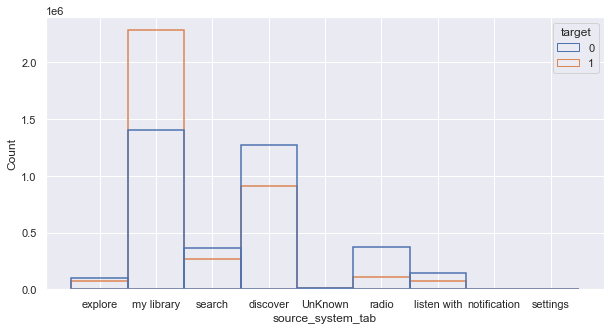

In [137]:
fig = plt.figure(figsize=(10,5))
sns.histplot(data=data,x='source_system_tab',hue='target',fill=False)

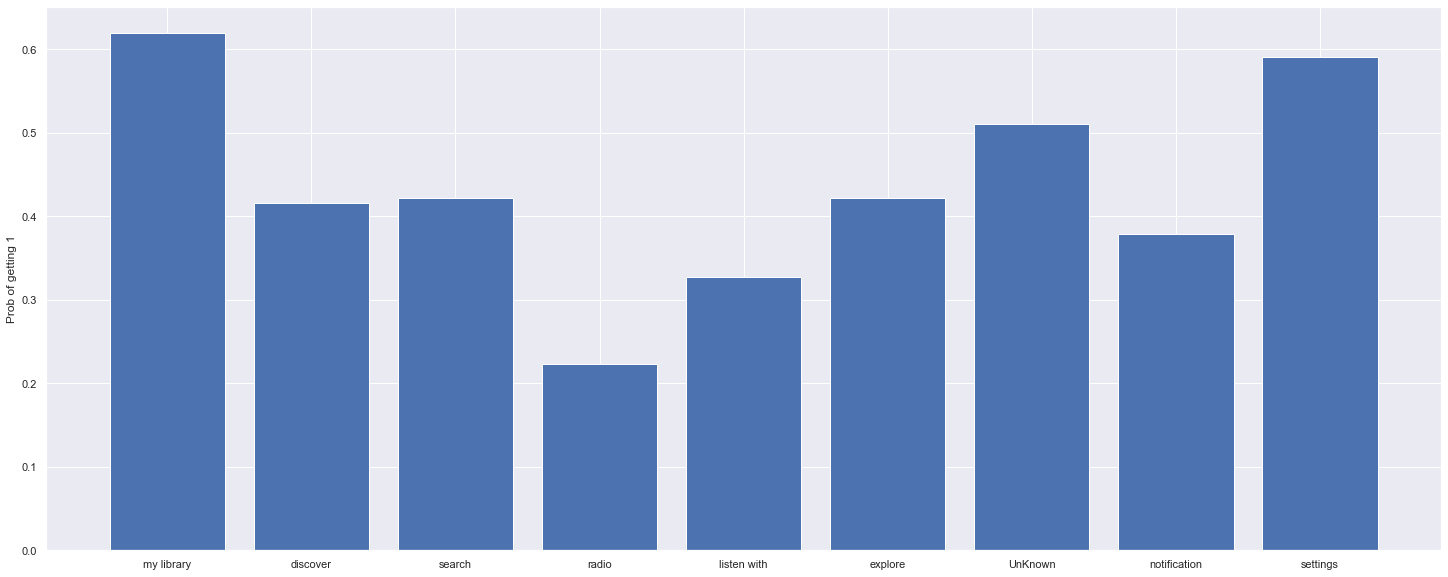

,0
my library,0.619659
discover,0.415770
search,0.421362
radio,0.222662
listen with,0.326581
explore,0.422146
UnKnown,0.510363
notification,0.378011
settings,0.590909


In [44]:
p = get_prob(data.source_system_tab)
p

In [70]:
p[0].iloc[:]

my library      0.619659
discover        0.415770
search          0.421362
radio           0.222662
listen with     0.326581
explore         0.422146
UnKnown         0.510363
notification    0.378011
settings        0.590909
Name: 0, dtype: float64

In [96]:
def bin1(x,p):
    #print(x)
    if x>0.5:
        return 2
    elif x> 0.3 and x<0.5:
        return 1
    else:
        return 0

In [87]:
source_system_tab_method_3 = data.source_system_tab.replace(list(p.index),p.values.reshape((1,len(p)))[0])#apply(lambda x:bin1(x,p))

In [90]:
source_system_tab_method_3.head(5)

0    0.422146
1    0.619659
2    0.619659
3    0.619659
4    0.422146
Name: source_system_tab, dtype: float64

In [98]:
source_system_tab_method_2 = source_system_tab_method_3.map(lambda x:bin1(x,p))

In [100]:
source_system_tab_method_2.head(5)

0    1
1    2
2    2
3    2
4    1
Name: source_system_tab, dtype: int64

In [ ]:
source_system_tab_method_3 = data.source_system_tab.replace(list(p.keys()),

It looks like there is above 50% probarility that a song is hard again if it is in my library or in 
setting(though very less instances to claim this)

In [155]:
d = data.source_screen_name.value_counts()
d

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
UnKnown                  414804
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

<AxesSubplot:xlabel='source_screen_name', ylabel='Count'>

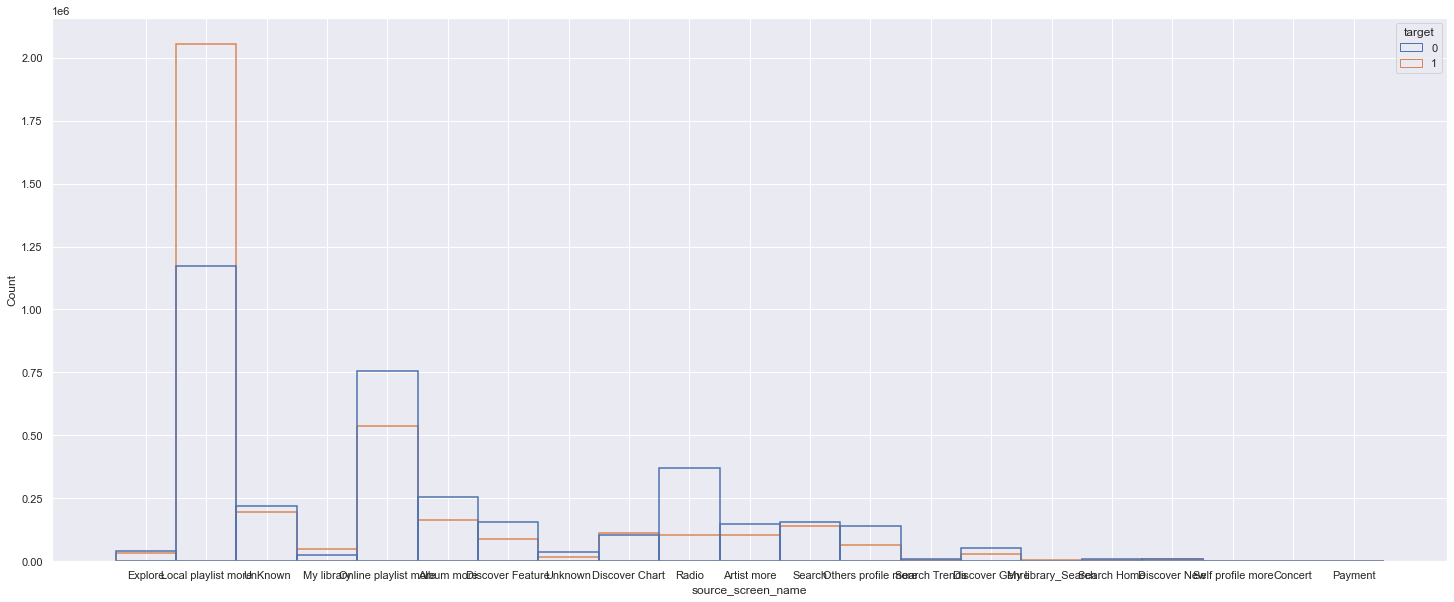

In [161]:
fig = plt.figure(figsize=(25,10))
sns.histplot(data=data,x='source_screen_name',hue='target',fill=False)

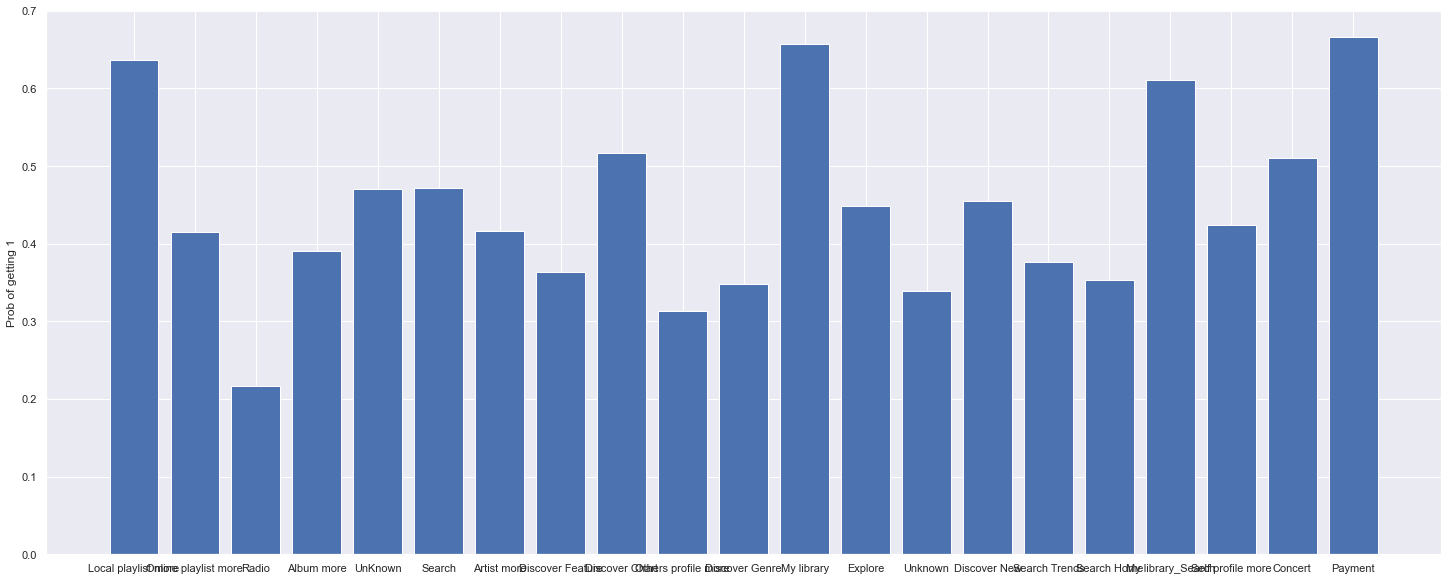

,0
Local playlist more,0.636983
Online playlist more,0.414939
Radio,0.217256
Album more,0.390553
UnKnown,0.469788
Search,0.471749
Artist more,0.416858
Discover Feature,0.364104
Discover Chart,0.517032
Others profile more,0.312629


In [101]:
p= get_prob(data.source_screen_name)
p

In [102]:
source_screen_name_method_3 = data.source_screen_name.replace(list(p.index),p.values.reshape((1,len(p)))[0])#apply(lambda x:bin1(x,p))

In [103]:
source_screen_name_method_2 = source_screen_name_method_3.map(lambda x:bin1(x,p))

# Source Type

In [9]:
data.source_type.value_counts()

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
UnKnown                     21539
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

<AxesSubplot:xlabel='source_type', ylabel='Count'>

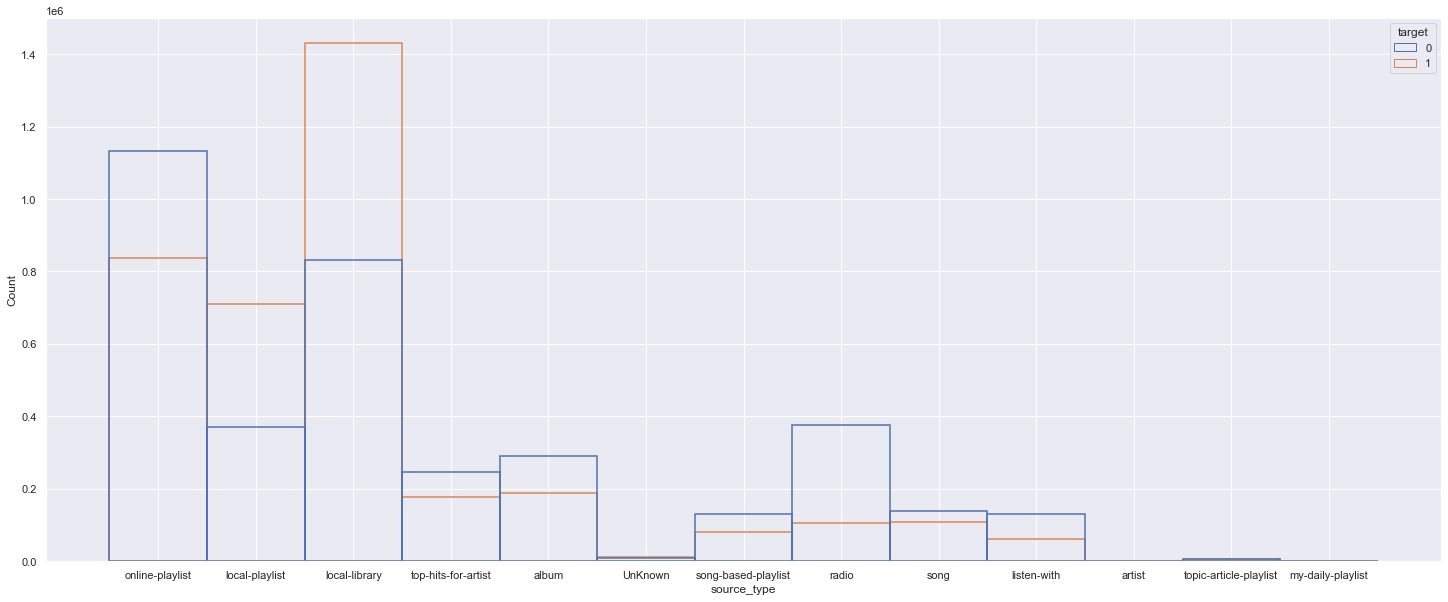

In [10]:
fig = plt.figure(figsize=(25,10))
sns.histplot(data=data,x='source_type',hue='target',fill=False)

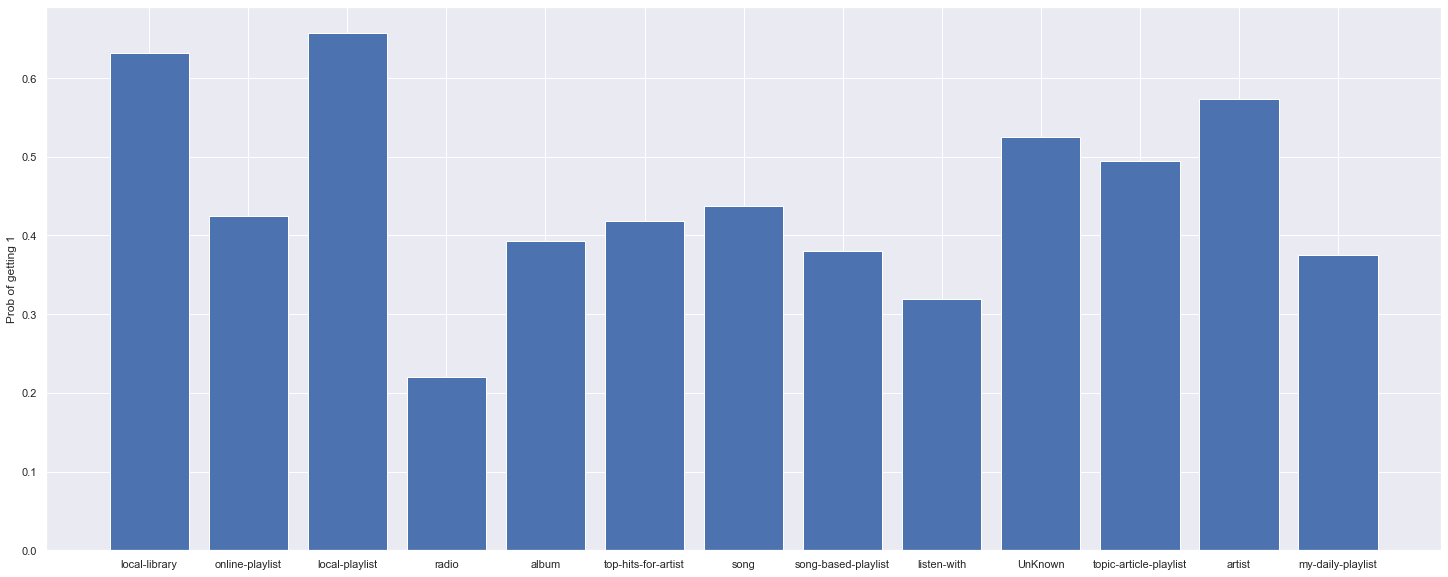

In [106]:
p = get_prob(data.source_type)

In [107]:
source_type_method_3 = data.source_type.replace(list(p.index),p.values.reshape((1,len(p)))[0])#apply(lambda x:bin1(x,p))

In [108]:
source_type_method_2 = source_type_method_3.map(lambda x:bin1(x,p))

In [111]:
c = data.columns
c,len(c)

(Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
        'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
        'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
        'registered_via', 'registration_init_time', 'expiration_date',
        'membership_days', 'registration_year', 'registration_month',
        'registration_day', 'expiration_year', 'expiration_month',
        'expiration_day'],
       dtype='object'),
 25)

In [15]:
data.song_length

0          206471.0
1          284584.0
2          225396.0
3          255512.0
4          187802.0
             ...   
7377413    267958.0
7377414    227404.0
7377415    258298.0
7377416    524146.0
7377417    254026.0
Name: song_length, Length: 7377418, dtype: float64

<AxesSubplot:xlabel='song_length', ylabel='Density'>

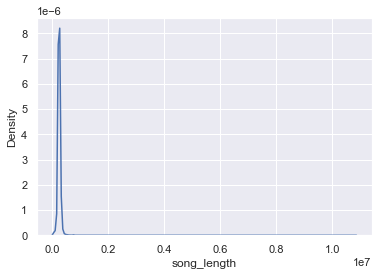

In [16]:
sns.kdeplot(data.song_length)

In [24]:
new_time = (data.song_length/data.song_length.mean()).round()

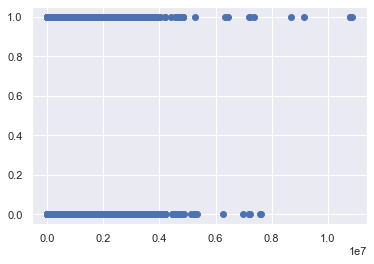

In [14]:

plt.scatter(data.song_length,data.target)

In [27]:
new_time.value_counts()

1.0     7165975
2.0      100261
0.0       97875
3.0        7351
4.0        2494
5.0        1347
6.0         621
7.0         443
8.0         282
15.0        236
13.0         89
14.0         88
9.0          85
12.0         66
11.0         40
19.0         39
16.0         36
10.0         32
17.0         15
20.0         13
22.0          9
29.0          5
44.0          3
18.0          3
26.0          3
31.0          2
21.0          1
28.0          1
30.0          1
37.0          1
35.0          1
Name: song_length, dtype: int64

<AxesSubplot:xlabel='song_length', ylabel='Count'>

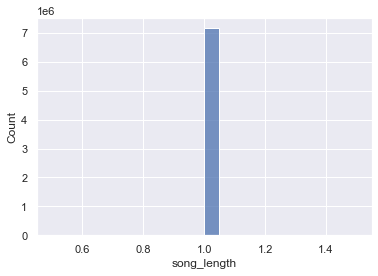

In [31]:
sns.histplot(x=new_time[new_time==1.0],bins=20)

In [26]:
(data.song_length/data.song_length.mean())

0          0.842323
1          1.160995
2          0.919530
3          1.042392
4          0.766161
             ...   
7377413    1.093167
7377414    0.927722
7377415    1.053758
7377416    2.138317
7377417    1.036330
Name: song_length, Length: 7377418, dtype: float64

# Genera_Id

In [6]:
data.genre_ids

0           359
1          1259
2          1259
3          1019
4          1011
           ... 
7377413    1259
7377414     465
7377415     465
7377416    2122
7377417     212
Name: genre_ids, Length: 7377418, dtype: object

In [18]:
data[data['target']==1].genre_ids.value_counts()

465                             1888202
458                              691696
921                              177096
1609                             159150
444                              123313
                                 ...   
1180|139                              1
921|1011                              1
458|531                               1
786|947|1609|2122|958                 1
864|465|242|850|1609|857|843          1
Name: genre_ids, Length: 467, dtype: int64

In [19]:
data[data['target']==0].genre_ids.value_counts()

465              1829488
458               569512
921               173215
1609              155939
444               120287
                  ...   
1609|2122|786          1
2122|2189|367          1
1609|947               1
880|786                1
921|423                1
Name: genre_ids, Length: 546, dtype: int64

In [35]:
data[data['genre_ids']=='786|947|1609|2122|958']

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,registered_via,registration_init_time,expiration_date,membership_days,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day
3152894,8VWjZIkdCD9s5mSBhUAHDTiWd4TSnflmqTyBNes3Hg0=,KlGe/c9CBWYE71dTPzXtPDCM23ROvgJo2BTylZosUD8=,my library,Local playlist more,local-library,1,218174.0,786|947|1609|2122|958,証聲音樂圖書館 echo music,Roberto Conrado,...,7,2011-03-01,2017-10-01,2406 days,2011,3,1,2017,10,1
4371392,tNvUsQwOJX5OgGsBBN9to3vI+DoUc6S1BFgNXUaYoo0=,3M2vQ2EpqgfOSzVCtJUdh1ZnQmqJzROo/tBoD+ggUkg=,my library,Local playlist more,local-library,0,153077.0,786|947|1609|2122|958,証聲音樂圖書館 echo music,Ross Andrew McLean (PRS) 50% James Kaleth (PRS...,...,3,2014-01-18,2017-10-16,1367 days,2014,1,18,2017,10,16


In [ ]:
# As we can see that the a genera like 465,458,921 etc have both 1 and 0 target values high.

In [24]:
p = get_prob(data.genre_ids,graph=False)

In [33]:
p

,0
465,0.507897
458,0.548439
921,0.505539
1609,0.505095
444,0.506211
...,...
2022|2215,1.000000
1609|947,0.000000
786|947|2022|2122|958,0.000000
444|359,0.000000


In [9]:
data.artist_name = data.artist_name.str.lower()

In [15]:
data.artist_name.head(50)

0                                         bastille
1                                  various artists
2                                              nas
3                                         soundway
4                                      brett young
5                                        desiigner
6                                  bigbang taeyang
7                                     thomas rhett
8                                      onerepublic
9                                      onerepublic
10                                lindsey stirling
11                                      嚴爵 (yen-j)
12                                    林俊傑 (jj lin)
13                                  周杰倫 (jay chou)
14                                    林俊傑 (jj lin)
15                                 various artists
16                                   吳汶芳 (fang wu)
17                                      amei (張惠妹)
18                                    林俊傑 (jj lin)
19                             

In [17]:
data.artist_name.value_counts()

various artists                    303616
周杰倫 (jay chou)                     186776
五月天 (mayday)                       182088
林俊傑 (jj lin)                       115325
田馥甄 (hebe)                         104946
                                    ...  
meli rodriguez| matcho| newball         1
crywolf & ianborg                       1
k. gates                                1
jorge & mateus                          1
johnny corporate                        1
Name: artist_name, Length: 40520, dtype: int64

In [112]:
c

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date',
       'membership_days', 'registration_year', 'registration_month',
       'registration_day', 'expiration_year', 'expiration_month',
       'expiration_day'],
      dtype='object')

In [117]:
data.composer = data.composer.str.lower()

In [120]:
data.language.value_counts()

 3.0     4044793
 52.0    1864789
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
Name: language, dtype: int64

<AxesSubplot:xlabel='language', ylabel='Count'>

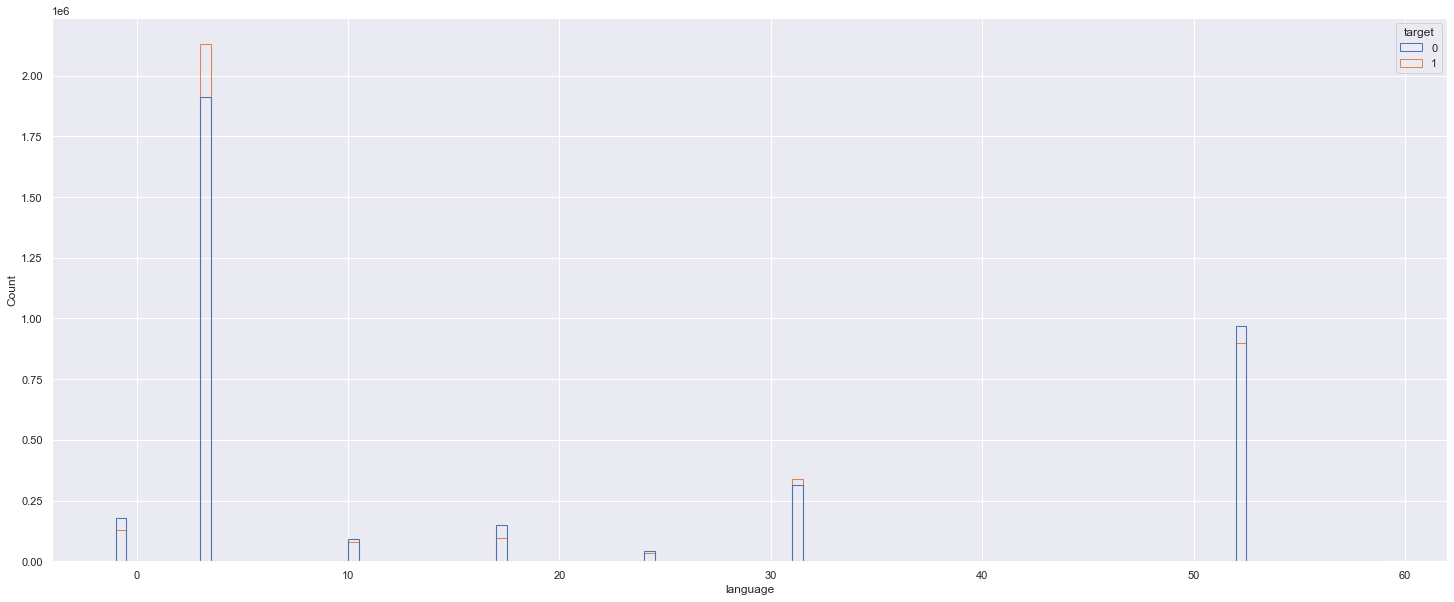

In [125]:
fig = plt.figure(figsize=(25,10))
sns.histplot(data=data,x='language',hue='target',fill=False)

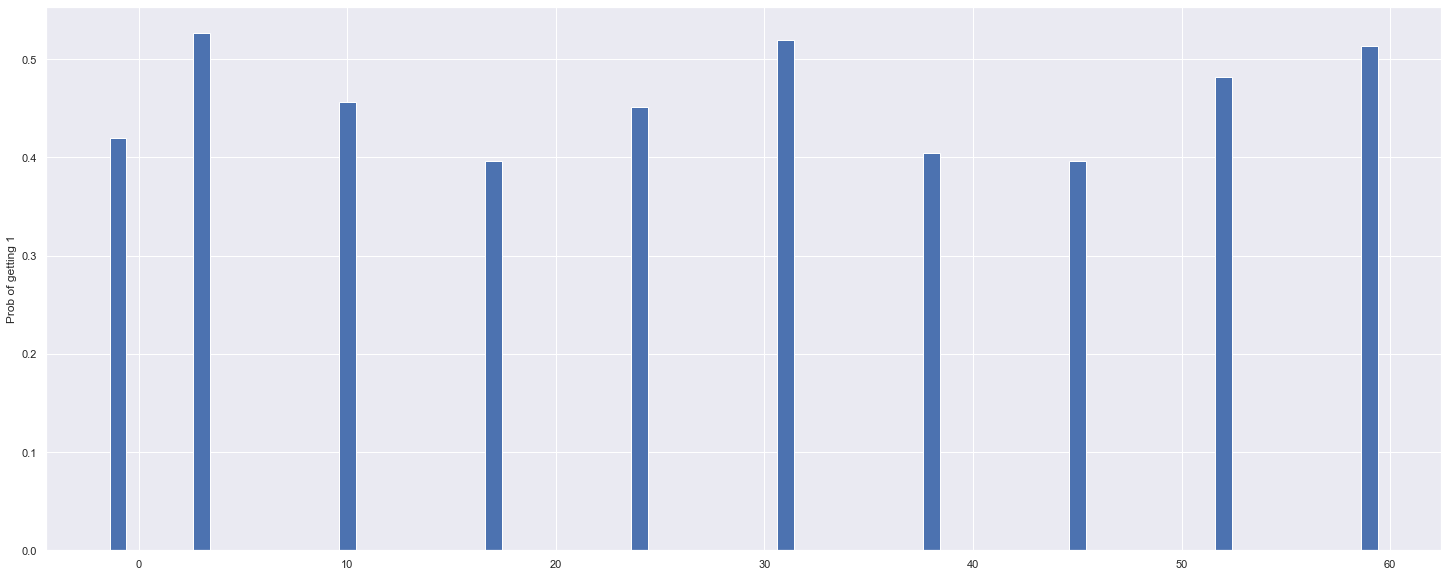

In [131]:
p = get_prob(data.language)

##  It lookes like it could be droped or may be we can try bining

In [132]:
language3 = data.language.replace(list(p.index),p.values.reshape((1,len(p)))[0])#apply(lambda x:bin1(x,p))

In [133]:
language2 = language3.map(lambda x:bin1(x,p))

<AxesSubplot:xlabel='city', ylabel='Count'>

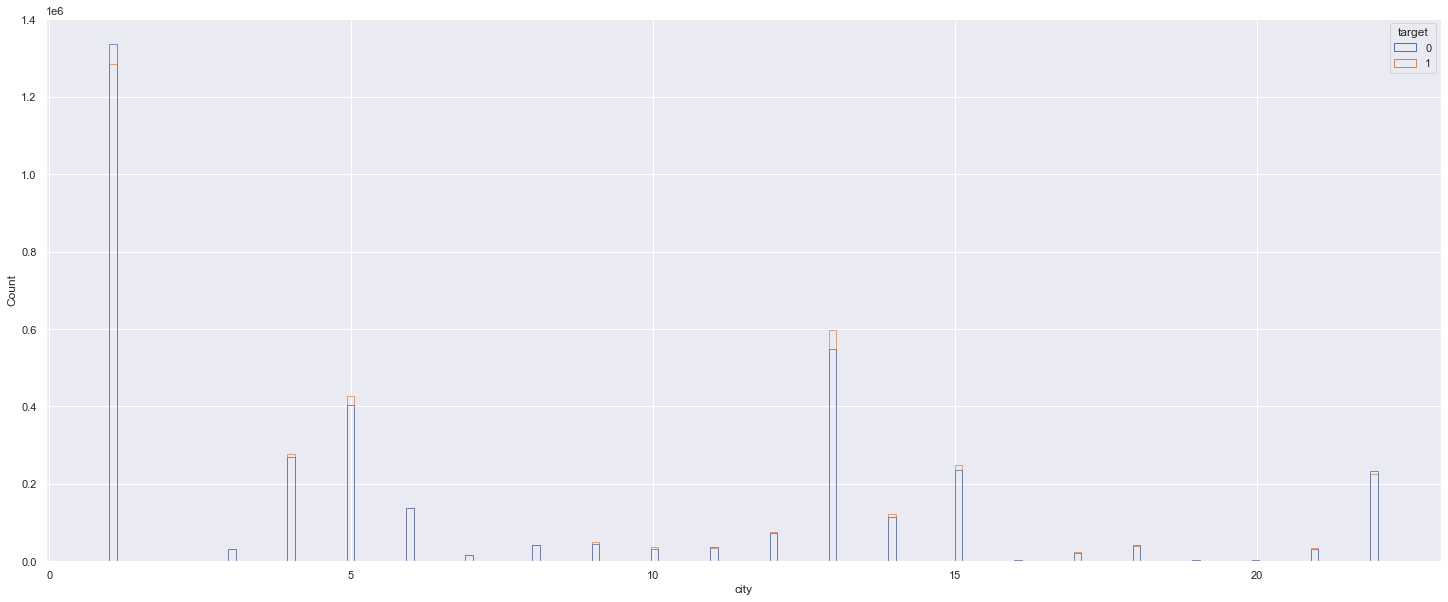

In [124]:
fig = plt.figure(figsize=(25,10))
sns.histplot(data=data,x='city',hue='target',fill=False)

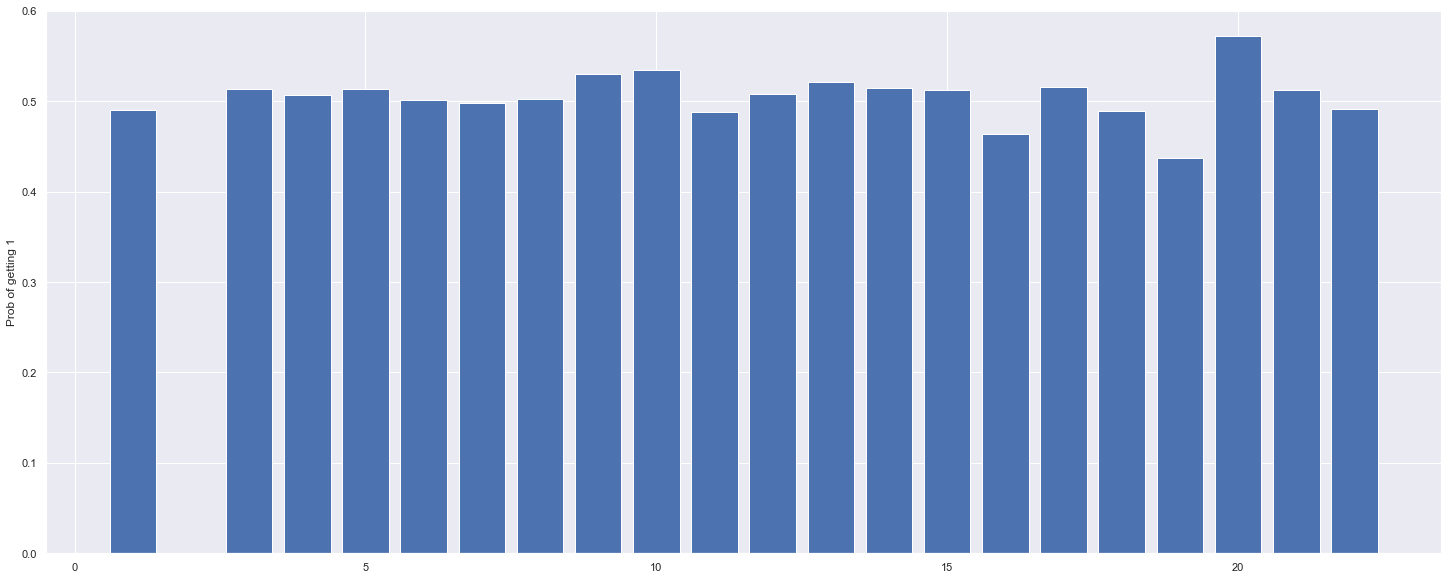

In [128]:
pp = get_prob(data.city)

## As you can see there is not much difference in the probabilities for the different cities hence we can drop that

In [135]:
data.drop(['city'],inplace=True,axis=1)

In [136]:
c

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date',
       'membership_days', 'registration_year', 'registration_month',
       'registration_day', 'expiration_year', 'expiration_month',
       'expiration_day'],
      dtype='object')

In [144]:
v = data.bd.value_counts()


In [147]:
v.index

Int64Index([   0,   25,   24,   26,   22,   27,   28,   23,   21,   29,   30,
              20,   31,   32,   19,   33,   18,   34,   35,   17,   36,   37,
              38,   40,   39,   41,   16,   43,   44,   45,   42,   47,   46,
              50,   49,   48,   51,   54,   53,   52,   55,   15,   59,   57,
              60,   58,   14,   56,   65,   62,   67,   63,   64,   66,   61,
              74,  103,  111, 1030,  105,    7,   72,    3,   82,    5,   73,
              10,   13,    2,   68,   11,  931,   12,   95,   87,  144,  131,
             -43,  107,  112,  -38,  102,   83,   70,  106,   90,   85,   89,
              93,   78, 1051,   76],
           dtype='int64')

<AxesSubplot:xlabel='bd', ylabel='Count'>

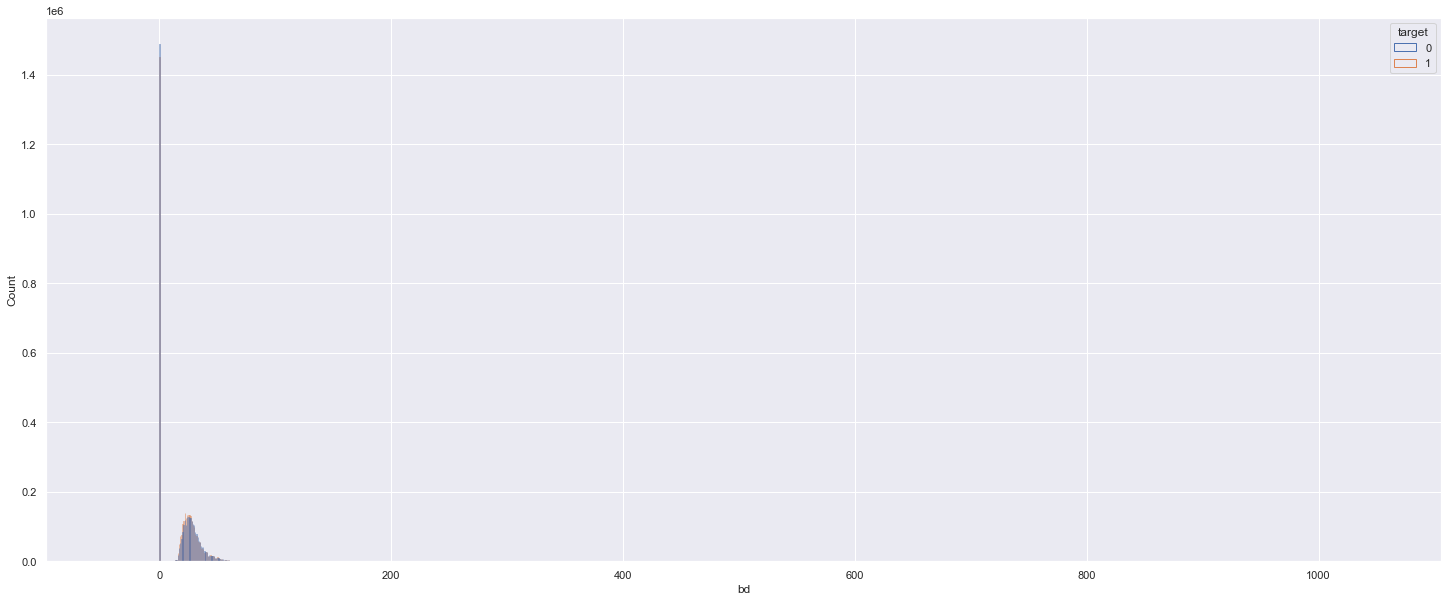

In [139]:
fig = plt.figure(figsize=(25,10))
sns.histplot(data=data,x='bd',hue='target',fill=False)

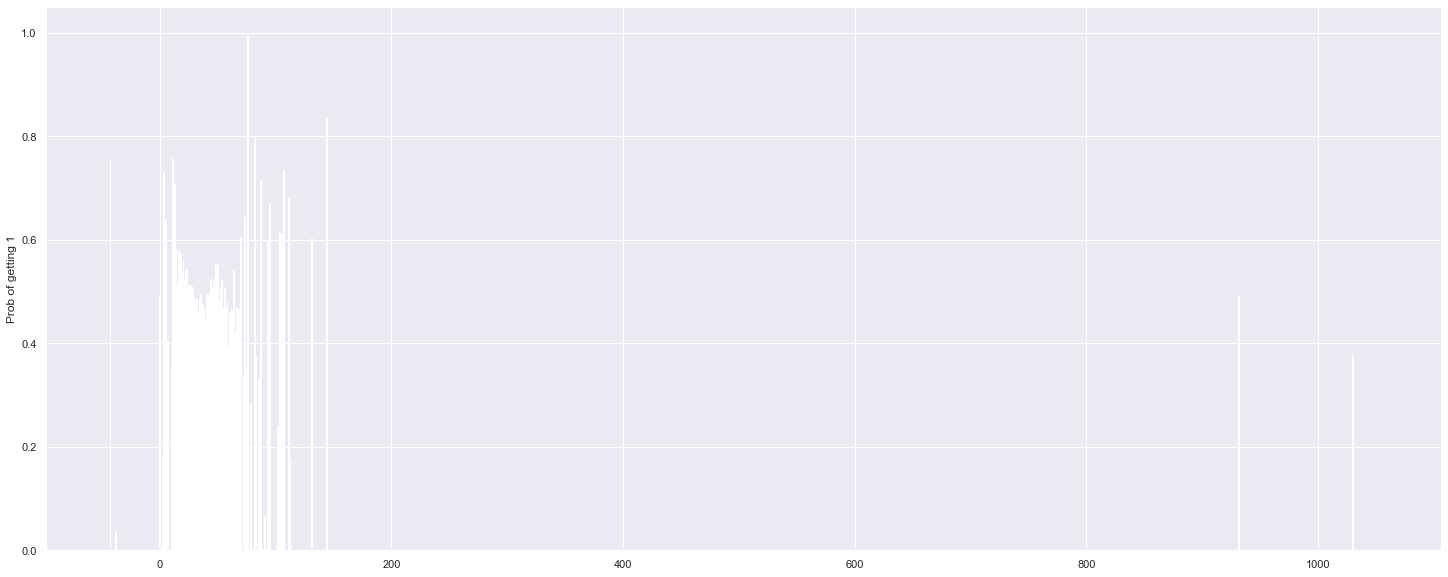

,0
0,0.493325
25,0.512642
24,0.512602
26,0.513730
22,0.539841
...,...
89,0.000000
93,0.600000
78,0.285714
1051,0.000000


In [140]:
pp = get_prob(data.bpp

In [153]:
data.gender.value_counts()

UnKnown    2961479
male       2297623
female     2118316
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='Count'>

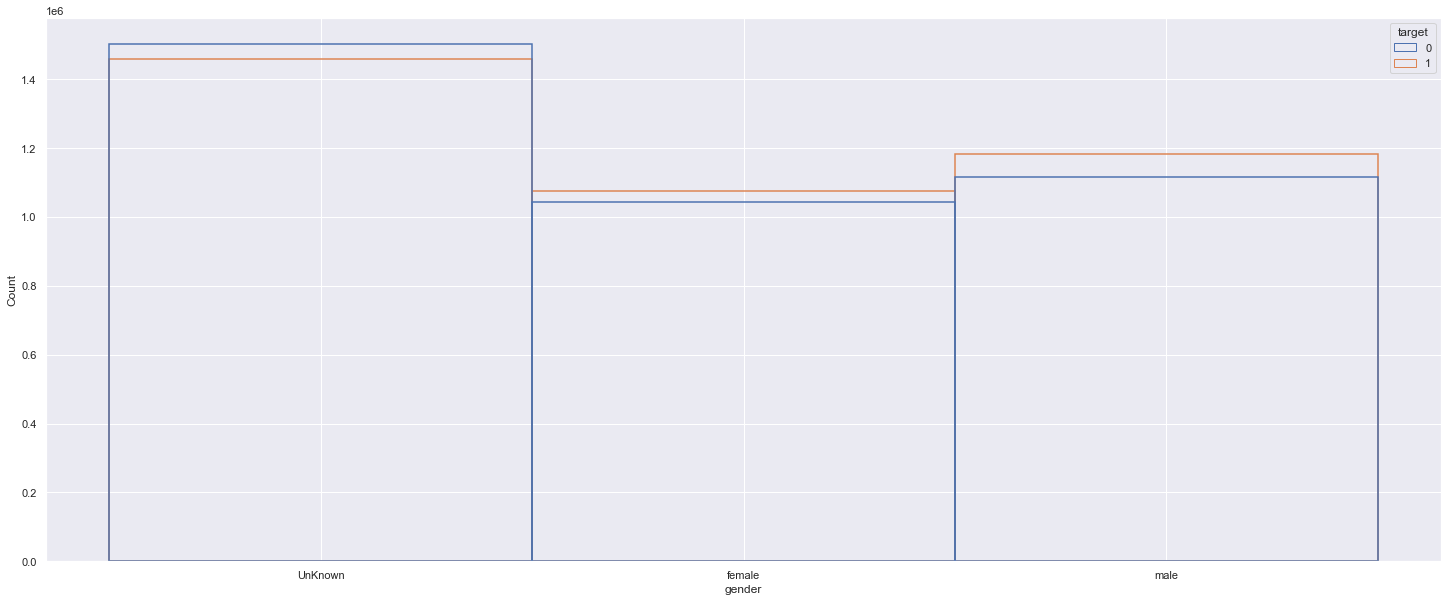

In [154]:
fig = plt.figure(figsize=(25,10))
sns.histplot(data=data,x='gender',hue='target',fill=False)

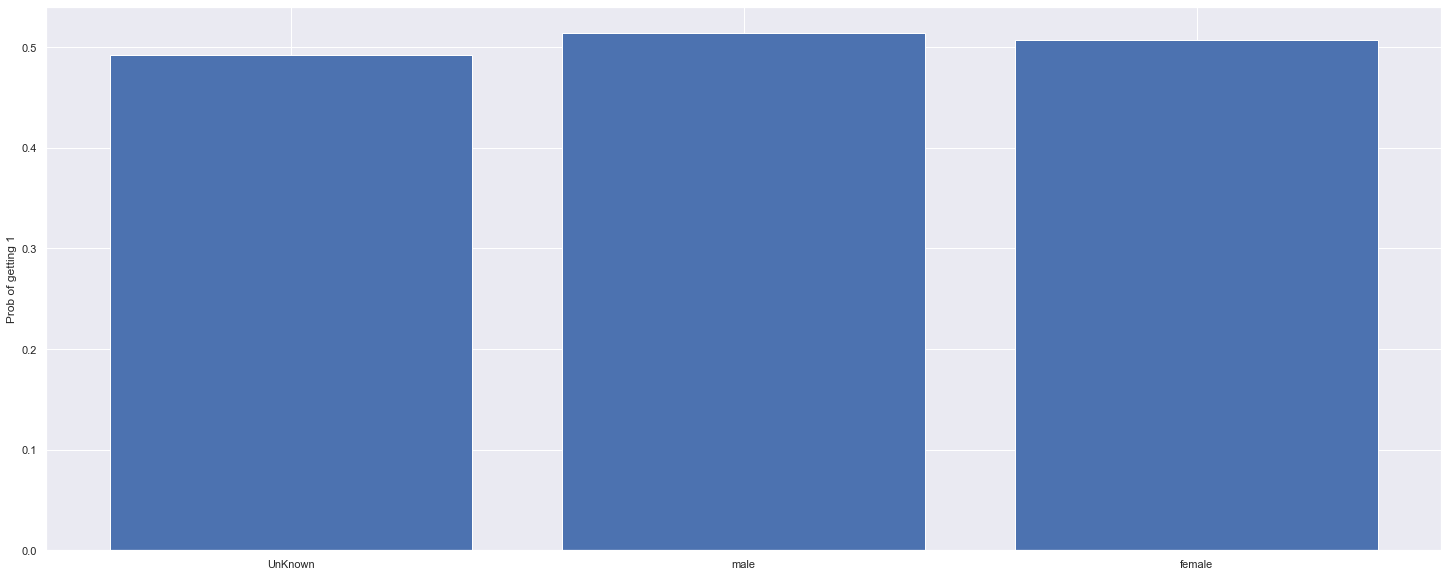

,0
UnKnown,0.492375
male,0.514423
female,0.507265


In [155]:
get_prob(data.gender)

## so as we can see that there is almost same prob for all the classes hence we can remove the perticular feature

In [156]:
data.drop(['gender'],axis=1,inplace=True)

In [157]:
c

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date',
       'membership_days', 'registration_year', 'registration_month',
       'registration_day', 'expiration_year', 'expiration_month',
       'expiration_day'],
      dtype='object')

In [158]:
data.registered_via.value_counts()

9     2814535
7     2551743
3     1250790
4      745251
13      15099
Name: registered_via, dtype: int64

<AxesSubplot:xlabel='registered_via', ylabel='Count'>

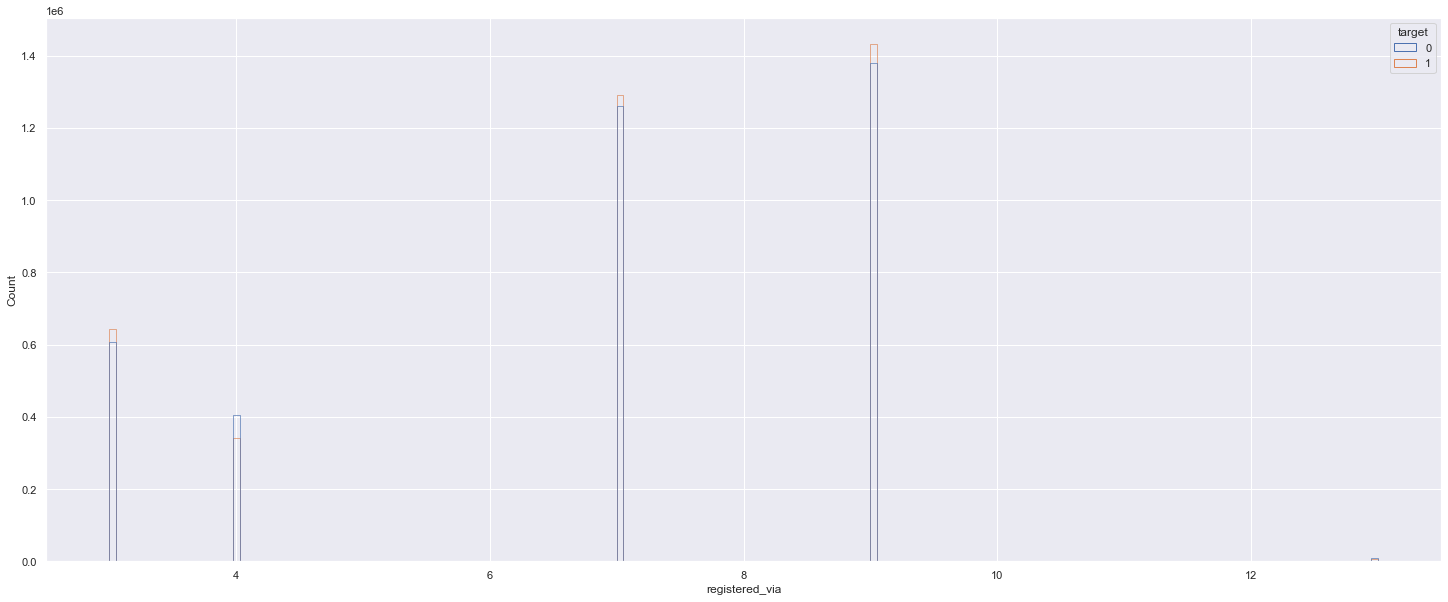

In [159]:
fig = plt.figure(figsize=(25,10))
sns.histplot(data=data,x='registered_via',hue='target',fill=False)

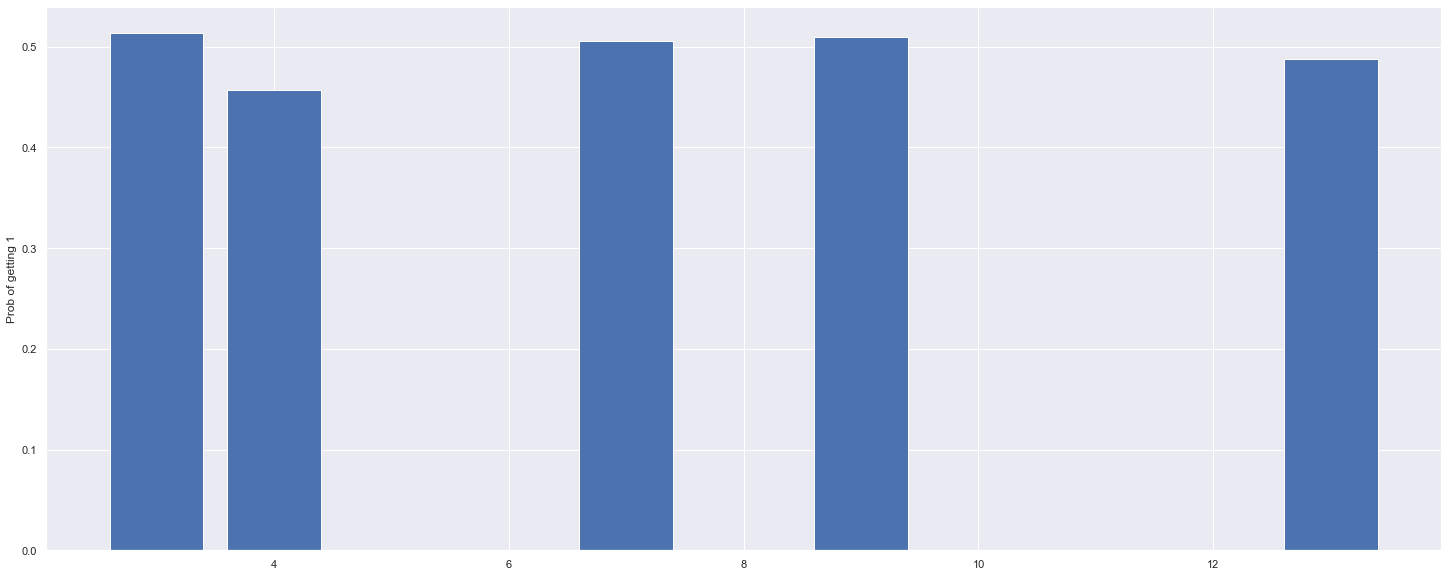

,0
9,0.509343
7,0.505659
3,0.514073
4,0.456784
13,0.487847


In [160]:
get_prob(data.registered_via)

## so we can find that registered_via is also showing similar probability for different classes 

In [169]:
data.drop(['registered_via'],axis=1,inplace=True)

In [162]:
data.drop(['registration_init_time'],axis=1,inplace=True)

In [163]:
data.drop(['expiration_date'],axis=1,inplace=True)

In [164]:
c

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date',
       'membership_days', 'registration_year', 'registration_month',
       'registration_day', 'expiration_year', 'expiration_month',
       'expiration_day'],
      dtype='object')

In [178]:
#data.to_csv('Analysed.csv',index=False)

<strong> 
We are not concedring membership_days registration_day expiration_date expiration_year, expiration_month, expiration_day
<br>
 
Since they are not imp aspect for recomending songs, while registration_year and registration_month could help in <br>
understanding the period of songs heard
    
</strong>